In [1]:
from numpy import append
import json
from manager.label_manager import LabelManager
from manager.match import match_object
from manager import simple_attributes
from manager.position_error import *

from discontinuity_errors.breaks import *

In [7]:
with open('/mnt/bdd100k_mot/labels/box_track_20/true_labels_formatted.json', 'r') as f:
    true_labels_json = f.read()
with open('/mnt/bdd100k_mot/images/track/yolo_result_formatted.json', 'r') as f:
    yolo_labels_json = f.read()

true_labels = json.loads(true_labels_json)
yolo_labels = json.loads(yolo_labels_json)

In [12]:
true_labels_1 = {'02995fe4-e81dc93c': true_labels[:203]}
yolo_labels_1 = {'02995fe4-e81dc93c': yolo_labels[180249:180452]}

true_labels_1_str = json.dumps(true_labels_1)
yolo_labels_1_str = json.dumps(yolo_labels_1)

with open('true_labels_1.json', 'w') as f:
    f.write(true_labels_1_str)
with open('yolo_labels_1.json', 'w') as f:
    f.write(yolo_labels_1_str)

In [2]:
with open('true_labels_1.json', 'r') as f:
    true_labels_1_str = f.read()
with open('yolo_labels_1.json', 'r') as f:
    yolo_labels_1_str = f.read()

true_labels_1 = json.loads(true_labels_1_str)
yolo_labels_1 = json.loads(yolo_labels_1_str)

In [3]:
# replace img_dir with image directory
manager = LabelManager(true_labels_1, yolo_labels_1, match_object, img_dir = "/mnt/bdd100k_mot/images/track/train/02995fe4-e81dc93c/")

In [4]:
# add attributes -> from simple attributes
manager.add_attribute('img_size', simple_attributes.img_size)
manager.add_attribute('img_color', simple_attributes.avg_bb_wrapper(simple_attributes.img_color))
manager.add_attribute('img_lumin', simple_attributes.avg_bb_wrapper(simple_attributes.img_lumin))
manager.add_attribute('img_edges', simple_attributes.avg_bb_wrapper(simple_attributes.img_edges))


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [5]:
# evaluate position errors -> dashboard error
loc_error = define_location_error(x_center=[0.8, 1])

shape_error = define_shape_error(min_width=0.75)

dashboard_error = and_error(loc_error, shape_error)
errors, label_size = manager.eval_error("dashboard_error", dashboard_error)

print(errors) # evaluate errors based on these criteria (maybe more), and see if we 
print(label_size) # TODO: add more

defaultdict(<class 'int'>, {'fp': 21, 'fn': 1})
defaultdict(<class 'int'>, {'fn': 494, 'tp': 117, 'fp': 333})


In [6]:
# evaluate breaks -> try breaks function, and display kpi
metrics = manager.get_metric(metric_funct)
breaks = find_breaks(manager.labels, metrics)


In [11]:
breaks

{'02995fe4-e81dc93c': [90, 105]}

In [7]:
# TODO: evaluate how efficient we are at finding breaks -> with visualization and metrics -> maybe play around with hyper parameters



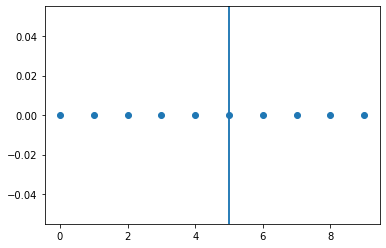

In [5]:
# display KPI to evaluate if RDD works -> play around with all parameters
display_kpi(manager.labels, video="02995fe4-e81dc93c", start_frame=0, kpi_funct=avg_kpi, attribute='img_color') #video -> video name to display, start_frame +> where to display -> find by hand


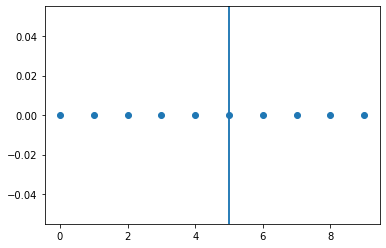

In [6]:
display_kpi(manager.labels, video="02995fe4-e81dc93c", start_frame=0, kpi_funct=avg_kpi, attribute='img_lumin') #video -> video name to display, start_frame +> where to display -> find by hand


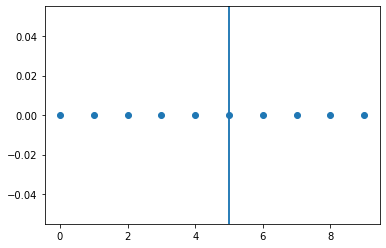

In [7]:
display_kpi(manager.labels, video="02995fe4-e81dc93c", start_frame=0, kpi_funct=avg_kpi, attribute='img_edges') #video -> video name to display, start_frame +> where to display -> find by hand


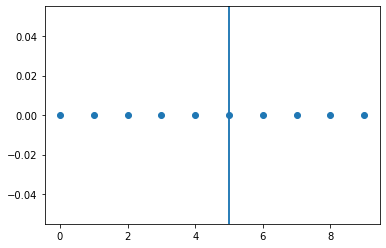

In [8]:
display_kpi(manager.labels, video="02995fe4-e81dc93c", start_frame=0, kpi_funct=avg_kpi, attribute='img_size') #video -> video name to display, start_frame +> where to display -> find by hand
